<a href="https://colab.research.google.com/github/chambeda/ml_finance/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [97]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

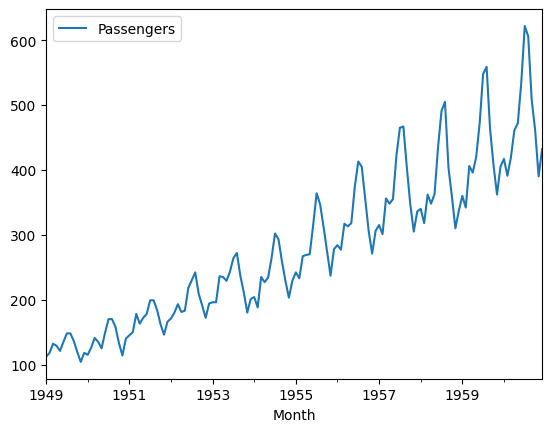

In [98]:
df.plot()

In [99]:
df['1stdiff'] = df['Passengers'].diff()

<Axes: xlabel='Month'>

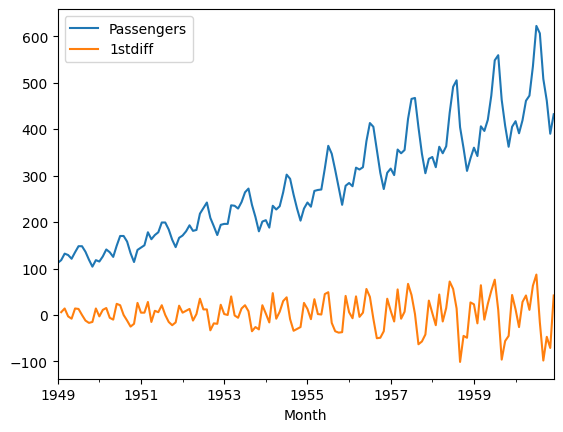

In [100]:
df.plot()

In [101]:
df['LogPassengers'] = np.log(df['Passengers'])

<Axes: xlabel='Month'>

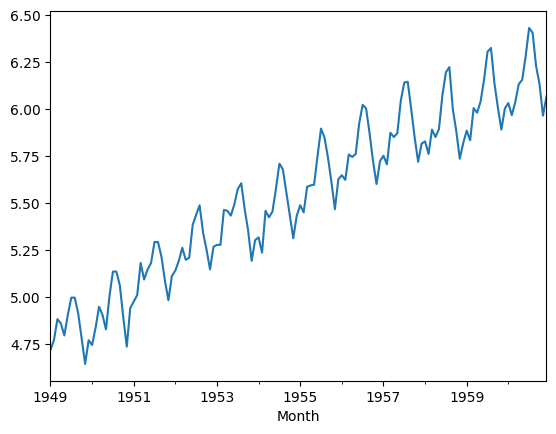

In [102]:
df['LogPassengers'].plot()

In [103]:
from statsmodels.tsa.arima.model import ARIMA

In [104]:
df.index.freq = 'MS'

Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [105]:
train

,Passengers,1stdiff,LogPassengers
Month,,,
1949-01-01,112,NaN,4.718499
1949-02-01,118,6.0,4.770685
1949-03-01,132,14.0,4.882802
1949-04-01,129,-3.0,4.859812
1949-05-01,121,-8.0,4.795791
...,...,...,...
1959-08-01,559,11.0,6.326149
1959-09-01,463,-96.0,6.137727
1959-10-01,407,-56.0,6.008813


In [106]:
test

,Passengers,1stdiff,LogPassengers
Month,,,
1960-01-01,417,12.0,6.033086
1960-02-01,391,-26.0,5.968708
1960-03-01,419,28.0,6.037871
1960-04-01,461,42.0,6.133398
1960-05-01,472,11.0,6.156979
1960-06-01,535,63.0,6.282267
1960-07-01,622,87.0,6.432940
1960-08-01,606,-16.0,6.406880
1960-09-01,508,-98.0,6.230481


In [107]:
arima = ARIMA(train['Passengers'], order=(1,0,0))

In [108]:
arima_result = arima.fit()

In [109]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -642.188
Date:                Sun, 25 Feb 2024   AIC                           1290.376
Time:                        20:54:46   BIC                           1299.024
Sample:                    01-01-1949   HQIC                          1293.890
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        262.4900     59.459      4.415      0.000     145.953     379.027
ar.L1          0.9618      0.020     47.210      0.000       0.922       1.002
sigma2       965.3628    111.663      8.645      0.000     746.507    1184.218
===================================================================================
Ljung-Box (L1) (Q):                  11.49   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.00   Prob(JB):                         0.71
Heteroskedasticity (H):               7.93   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
df.loc[:-Ntest, 'AR(1)'] = arima_result.predict(start=train.index[0], end=train.index[-1])

<ipython-input-110-7a0fbd31b02d>:1: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[:-Ntest, 'AR(1)'] = arima_result.predict(start=train.index[0], end=train.index[-1])


<Axes: xlabel='Month'>

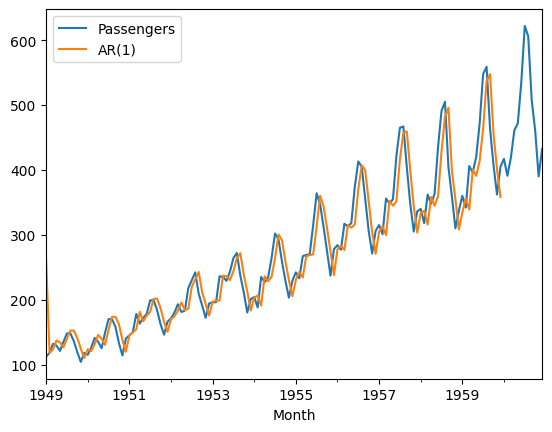

In [111]:
df[['Passengers', 'AR(1)']].plot()

In [112]:
forecast = arima_result.forecast(Ntest)
df.loc[-Ntest:, 'AR(1)'] = forecast

<ipython-input-112-fc0e45d056b3>:2: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[-Ntest:, 'AR(1)'] = forecast


<Axes: xlabel='Month'>

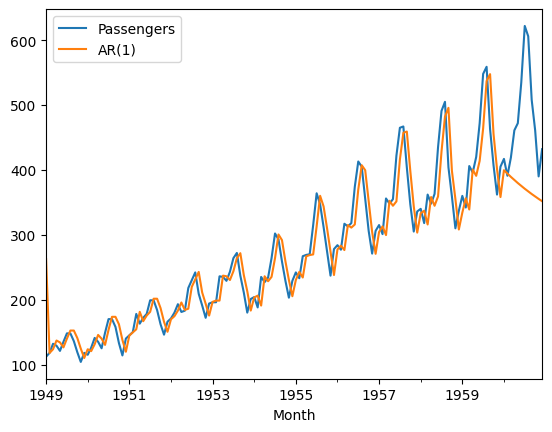

In [113]:
df[['Passengers', 'AR(1)']].plot()

In [114]:
def plot_fit_and_forecast(result):
  fig, ax = plt.subplots(figsize=(15,5))
  ax.plot(df['Passengers'], label='data')


  #plot the curve fitted on the train set
  train_pred = result.fittedvalues
  ax.plot(train.index, train_pred, color='green', label='fitted')

  #forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int['lower Passengers'], conf_int['upper Passengers']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)

  ax.legend()


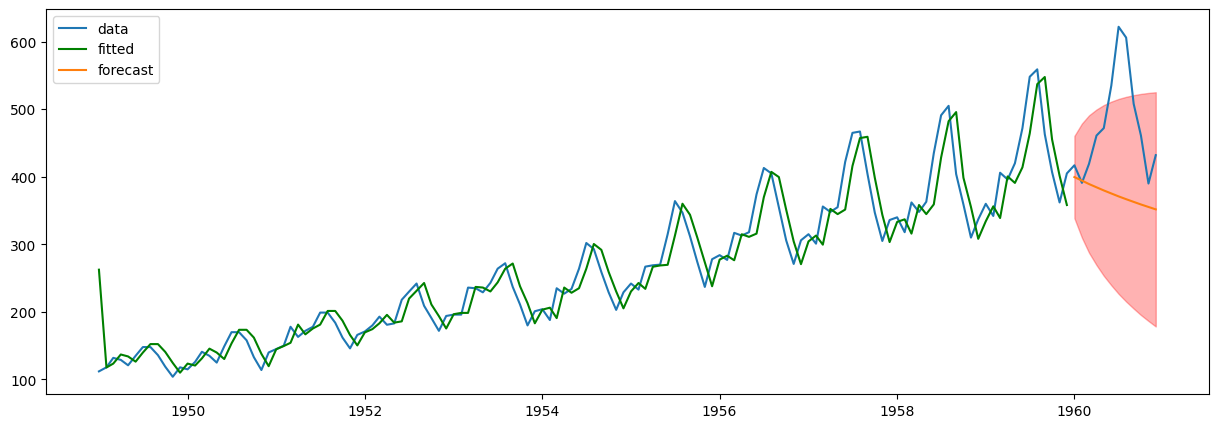

In [115]:
plot_fit_and_forecast(arima_result)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


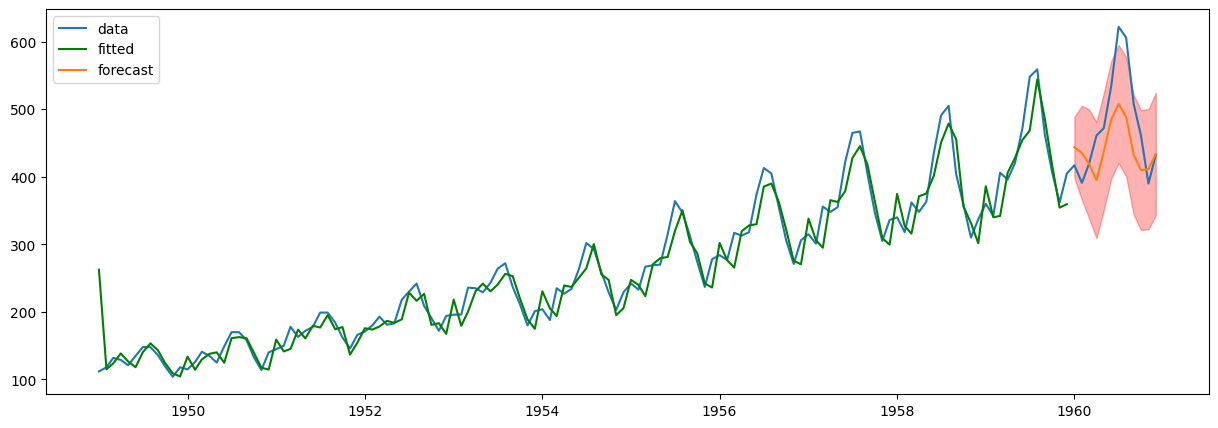

In [116]:
arima = ARIMA(train['Passengers'], order=(10,0,0))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


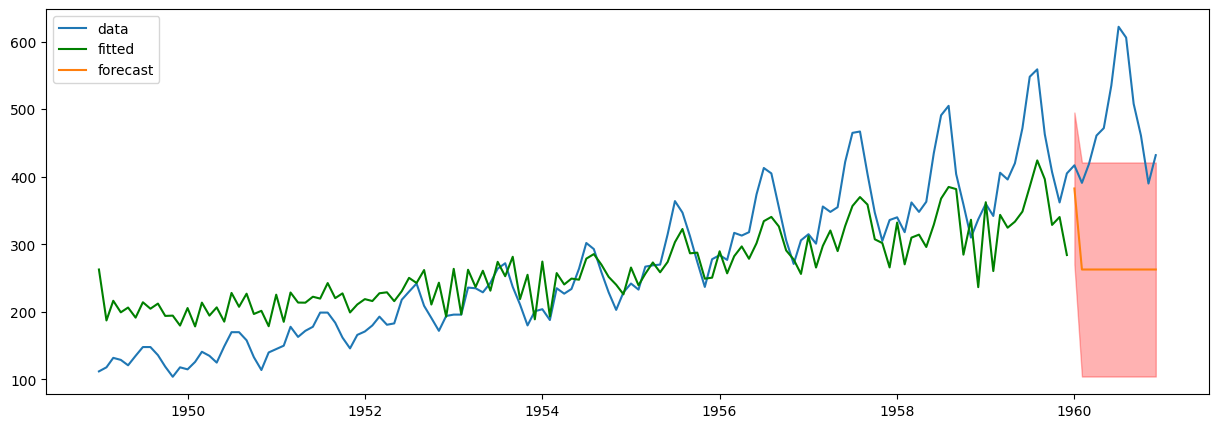

In [117]:
arima = ARIMA(train['Passengers'], order=(0,0,1))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

In [118]:
df['Log1stDiff'] = df['LogPassengers'].diff()

<Axes: xlabel='Month'>

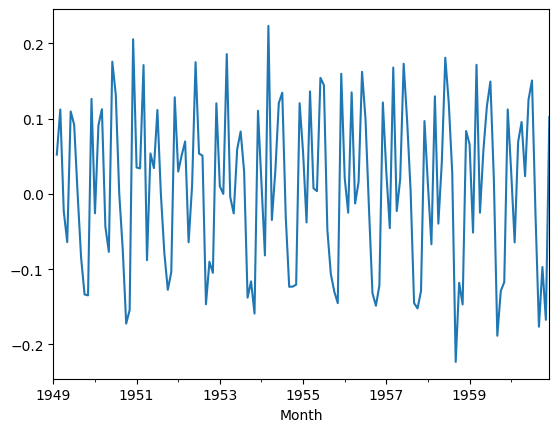

In [119]:
df['Log1stDiff'].plot()

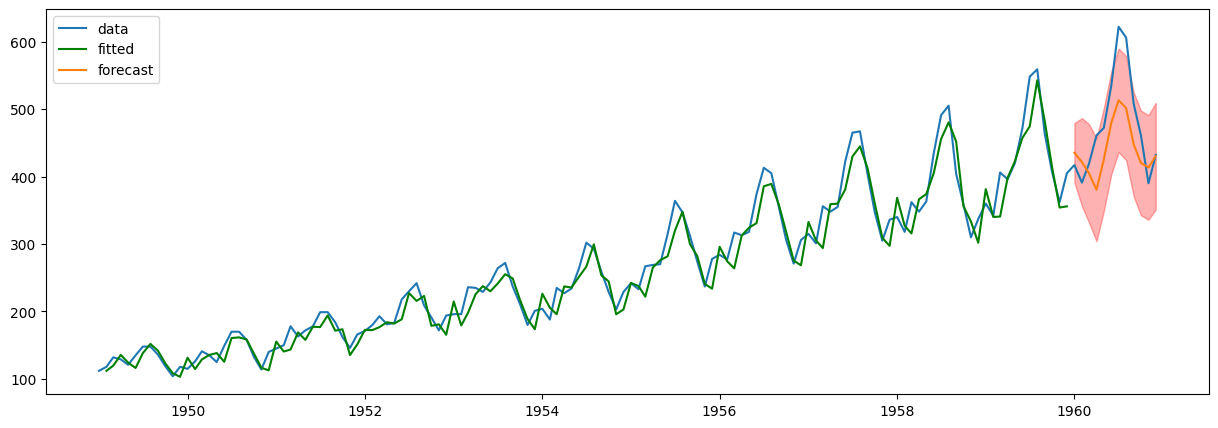

In [120]:
arima = ARIMA(train['Passengers'], order=(8,1,1))
arima_result_811 = arima.fit()

def plot_fit_and_forecast_int(result, d, col='Passengers'):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df[col], label='data')

  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1])

  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

plot_fit_and_forecast_int(arima_result_811, 1)

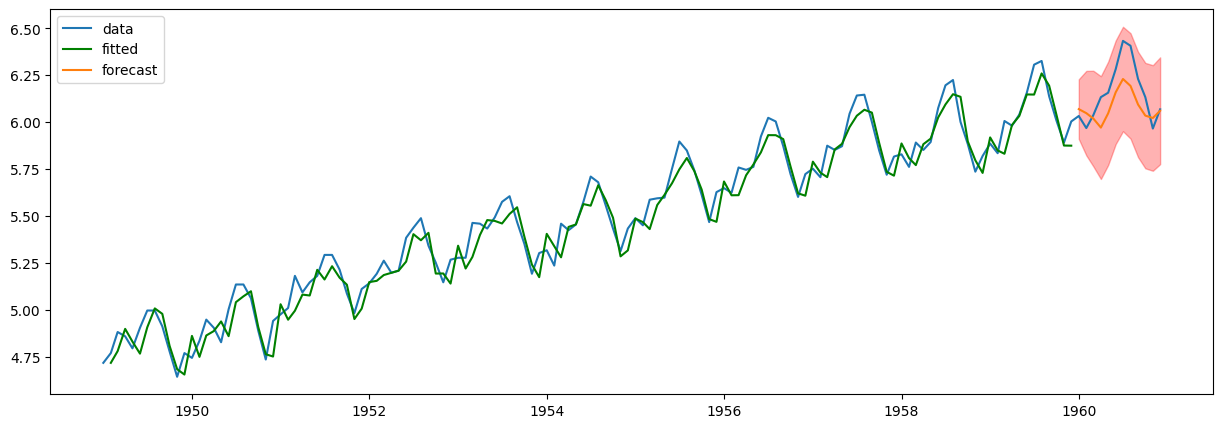

In [121]:
arima = ARIMA(train['LogPassengers'], order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col='LogPassengers')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


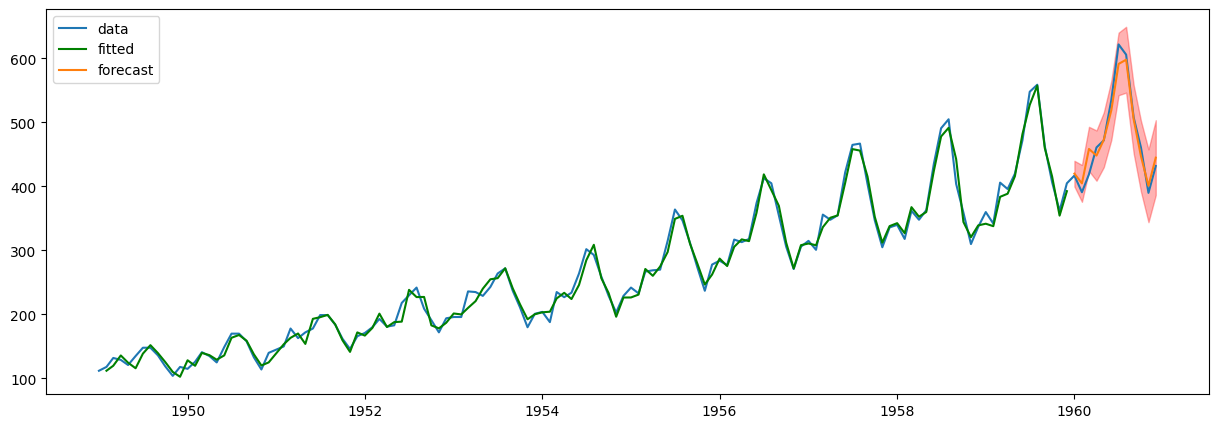

In [122]:
arima = ARIMA(train['Passengers'], order=(12,1,0))
arima_result_1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_1210, 1, col='Passengers')

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


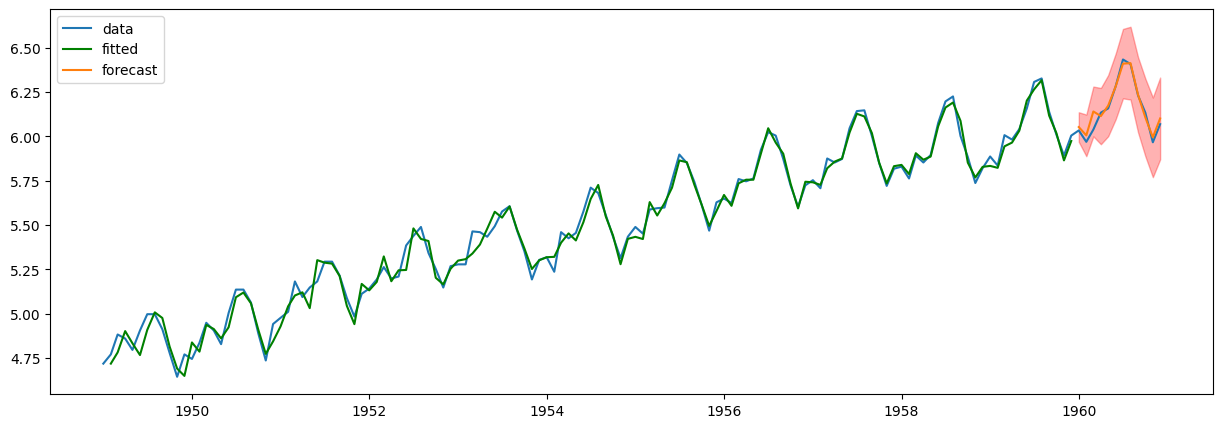

In [123]:
arima = ARIMA(train['LogPassengers'], order=(12,1,0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col='LogPassengers')

In [124]:
def rmse(result, is_logged):
  forecast = result.forecast(Ntest)
  if is_logged:
    forecast = np.exp(forecast)

  t = test['Passengers']
  y = forecast
  return np.sqrt(np.mean((t - y)**2))

In [125]:
print("ARIMA(8,1,1):", rmse(arima_result_811, False))
print("ARIMA(8,1,1) logged:", rmse(arima_result_log811, True))
print("ARIMA(12,1,0):", rmse(arima_result_1210, False))
print("ARIMA(12,1,0) logged:", rmse(arima_result_log1210, True))

ARIMA(8,1,1): 59.06458996764054
ARIMA(8,1,1) logged: 61.60694094843056
ARIMA(12,1,0): 17.492713114526254
ARIMA(12,1,0) logged: 16.130971144527244
